# Capstone Project

The Geo-Magnetic Field and WLAN Dataset for Indoor Localisation is a comprehensive dataset designed to address challenges in indoor positioning systems. It combines data from geo-magnetic fields, WLAN signals, and inertial sensors collected through smartwatches and smartphones. This dataset was created to provide a standardized framework for evaluating and comparing indoor localization algorithms, which is a key area of research in Ambient Intelligence (AmI). By offering synchronized data from multiple sources, it aims to overcome the lack of publicly available datasets in this field and facilitate advancements in indoor navigation technologies.
can find more details about this dataset on the "UCI Machine Learning Repository".

## Dataset Loading

In [4]:
import pandas as pd

In [6]:
import requests

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00377/GeoMagnetic_WiFi_dataset.zip"

# File name to save the dataset
file_name = "GeoMagnetic_WiFi_dataset.zip"

# Downloading the dataset
print("Downloading dataset...")
response = requests.get(url)

# Saving the file
with open(file_name, 'wb') as file:
    file.write(response.content)

print(f"Dataset downloaded successfully and saved as '{file_name}'.")


Dataset downloaded successfully and saved as 'GeoMagnetic_WiFi_dataset.zip'.


In [10]:
import pandas as pd

# Path to the CSV file
file_path = "measure2_watch_sens.csv"

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())
print(data.info())  # View detailed info about the dataset


       timestamp   AccelerationX   AccelerationY   AccelerationZ  \
0  1422628680350           0.000           0.000           0.000   
1  1422628680445           0.000           0.000           0.000   
2  1422628680545           0.000           0.000           0.000   
3  1422628680645           0.200           3.653           8.763   
4  1422628680744           0.235           3.691           8.867   

    MagneticFieldX   MagneticFieldY   MagneticFieldZ   Z-AxisAgle(Azimuth)  \
0              0.0              0.0              0.0                   0.0   
1              0.0              0.0              0.0                   0.0   
2              0.0              0.0              0.0                   0.0   
3              0.0              0.0              0.0                   0.0   
4              0.0              0.0              0.0                   0.0   

    X-AxisAngle(Pitch)   Y-AxisAngle(Roll)   GyroX   GyroY   GyroZ  
0                  0.0                 0.0     0.0   

In [14]:
print(data.shape)

(58374, 13)


In [18]:
import pandas as pd
from scipy.stats import skew

# Load the dataset
file_path = "measure2_watch_sens.csv"
data = pd.read_csv(file_path)

# Calculate skewness for each numerical column
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
skewness_values = numerical_data.apply(skew)  # Apply skewness calculation

# Display skewness results
print("Skewness of numerical columns:")
print(skewness_values)


Skewness of numerical columns:
timestamp               0.072638
 AccelerationX         -0.896399
 AccelerationY          1.831700
 AccelerationZ         -0.016813
 MagneticFieldX         0.310157
 MagneticFieldY        -1.093507
 MagneticFieldZ        -0.151743
 Z-AxisAgle(Azimuth)   -0.227925
 X-AxisAngle(Pitch)    -2.900975
 Y-AxisAngle(Roll)     -1.005365
 GyroX                 -1.574269
 GyroY                  0.674820
 GyroZ                 -0.579276
dtype: float64


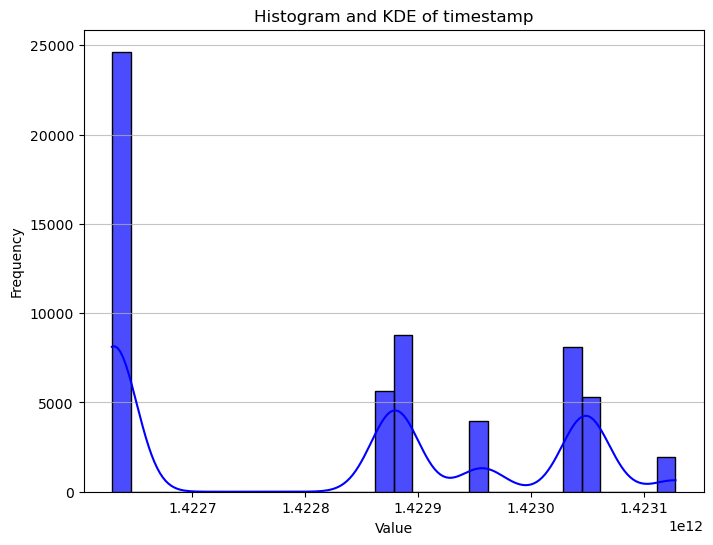

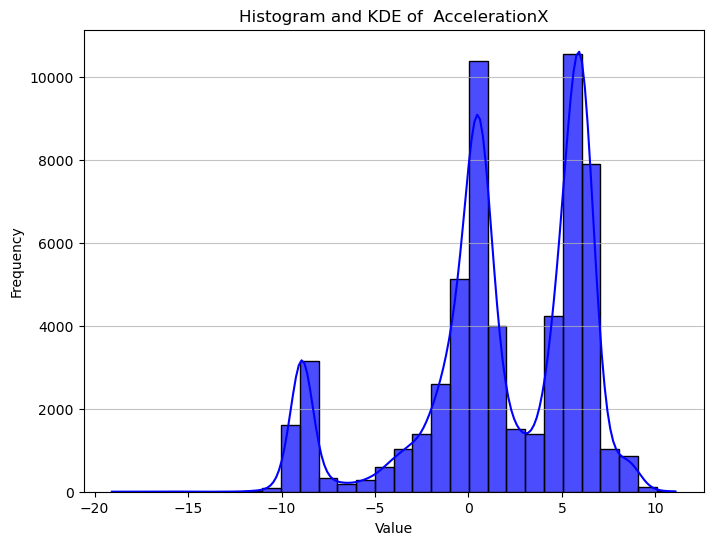

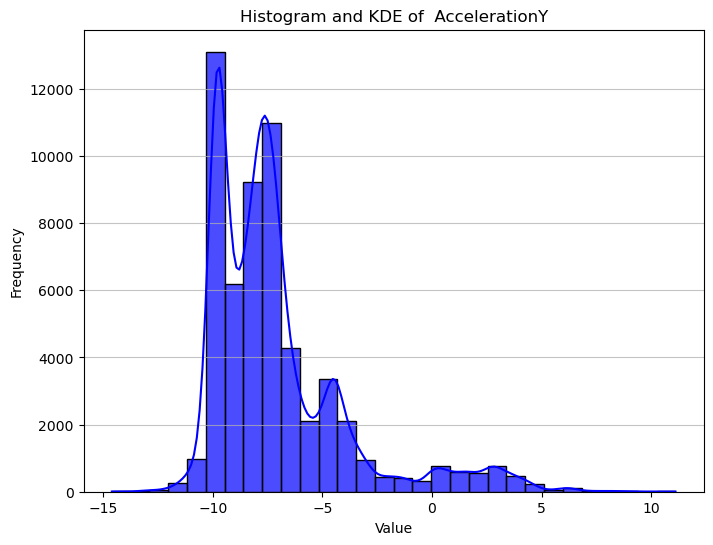

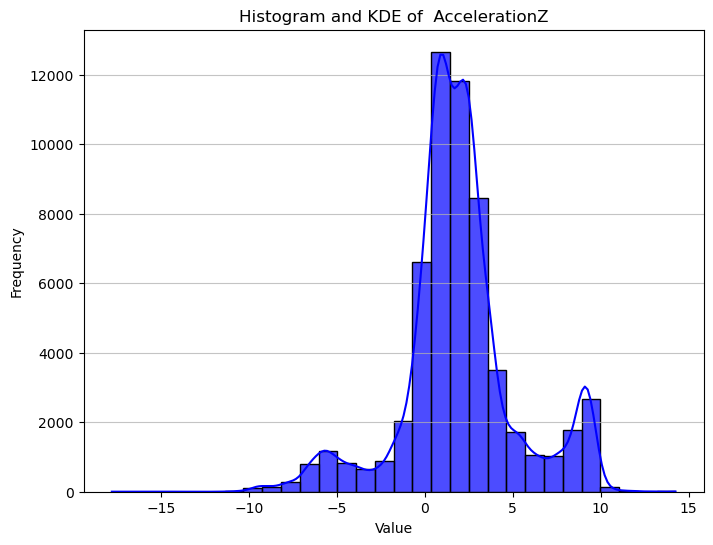

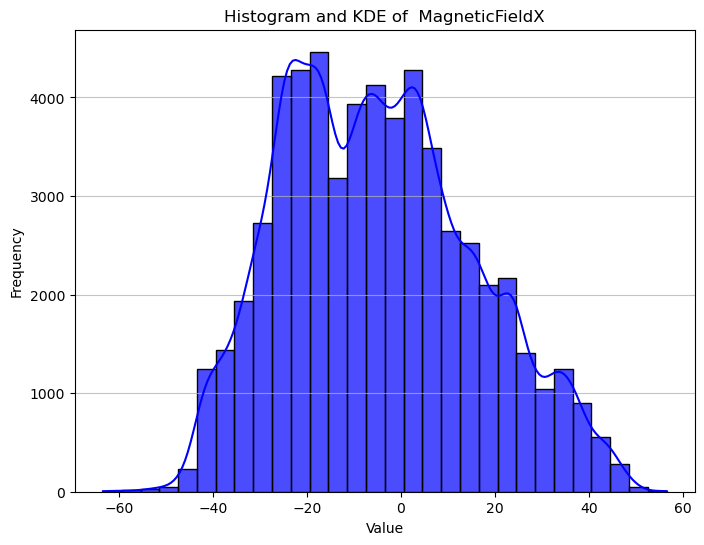

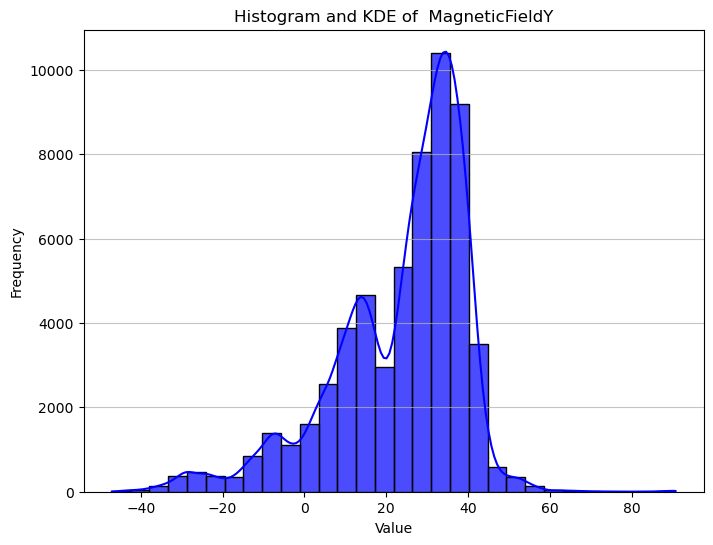

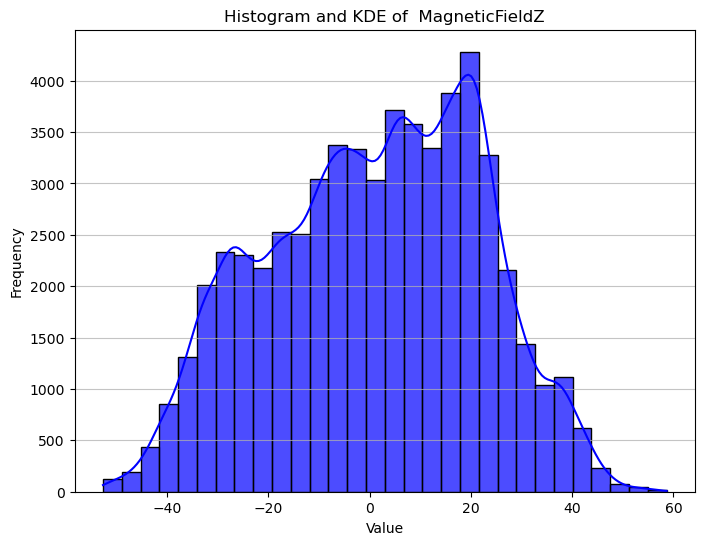

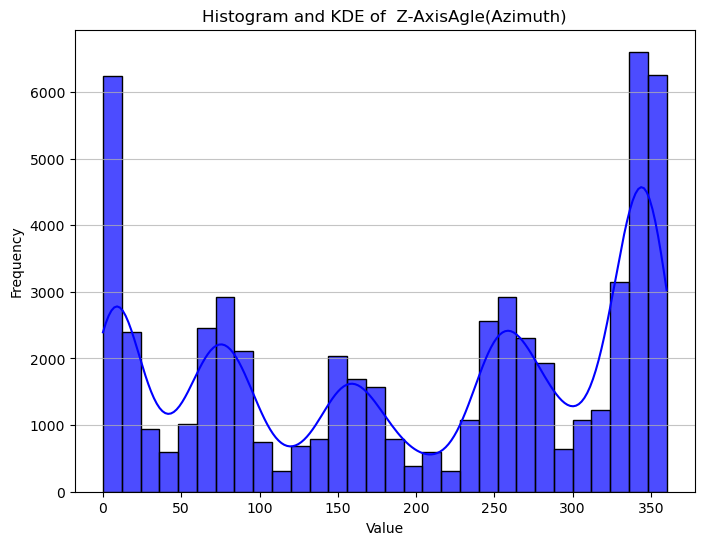

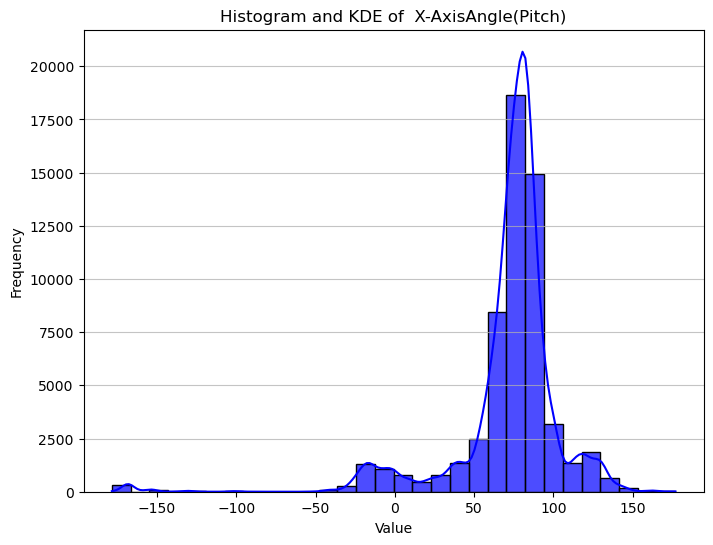

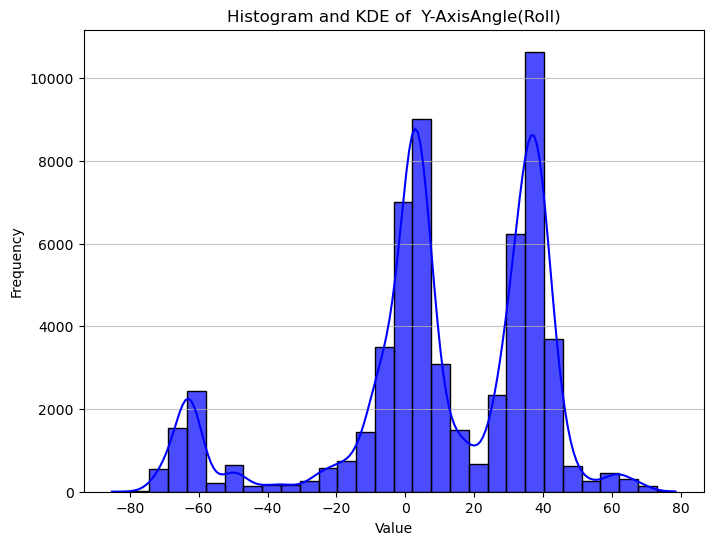

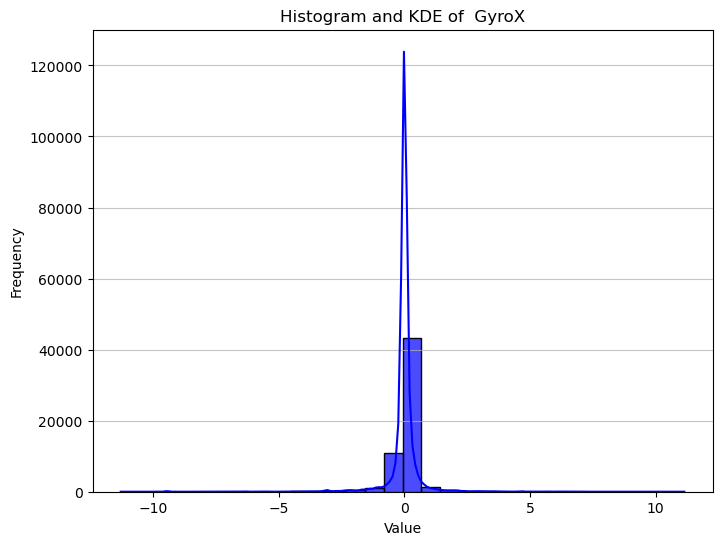

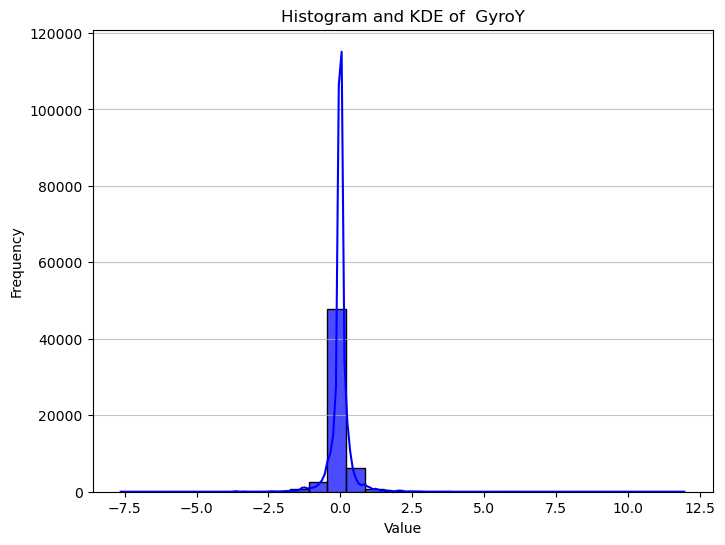

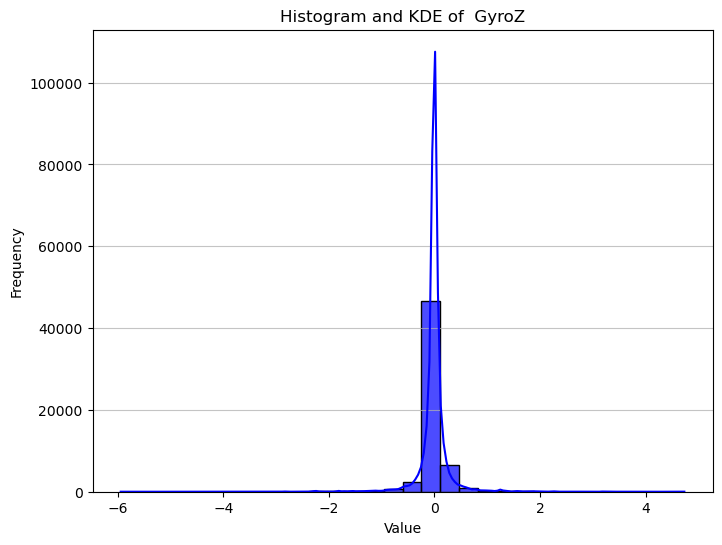

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "measure2_watch_sens.csv"
data = pd.read_csv(file_path)

# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Plot histograms with KDE for each numerical column
for column in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(numerical_data[column], kde=True, color='blue', bins=30, alpha=0.7)
    plt.title(f'Histogram and KDE of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


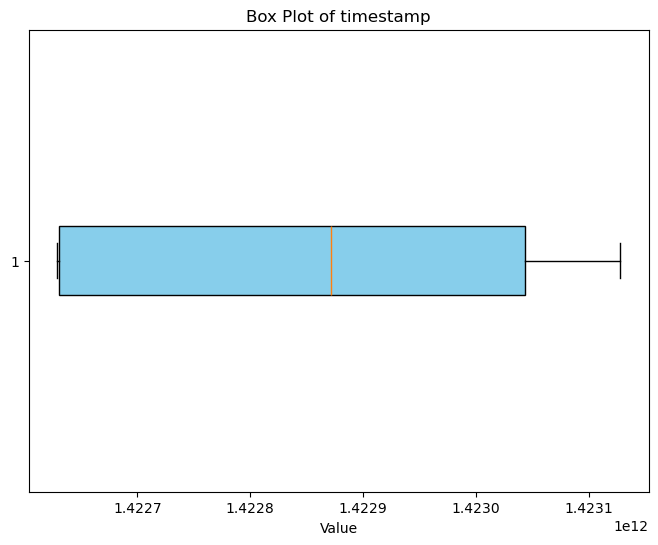

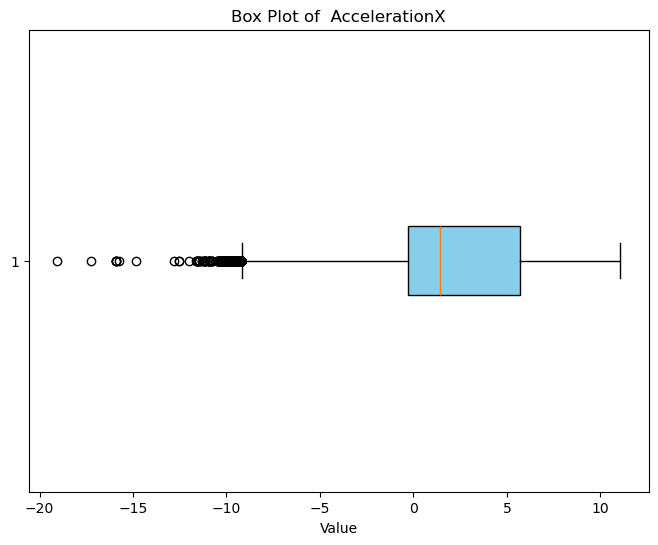

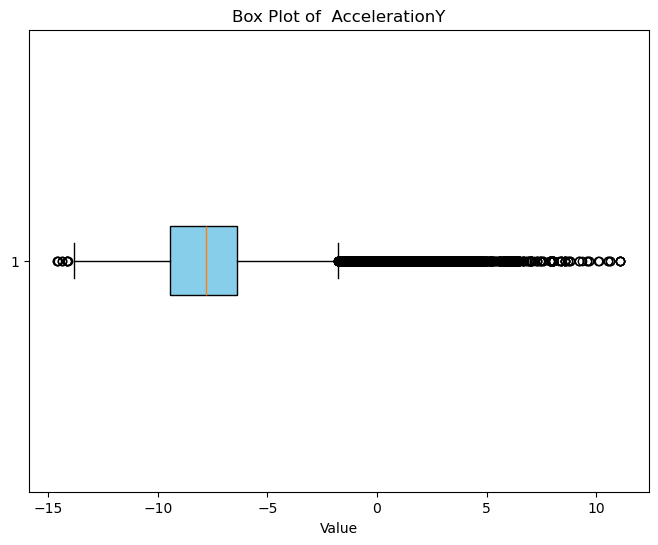

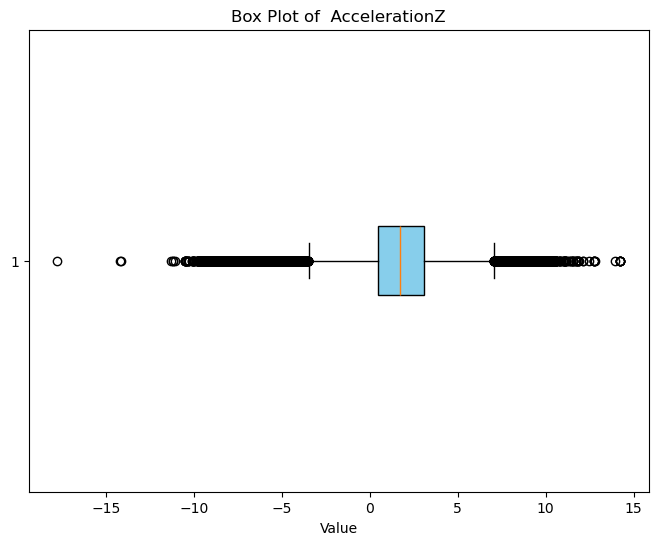

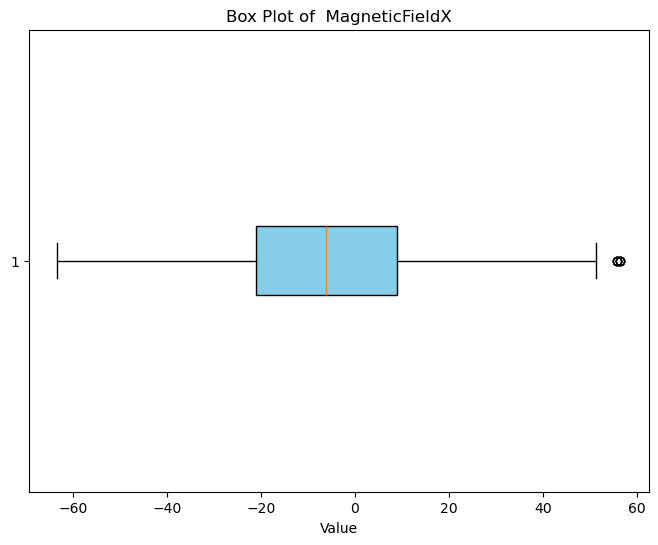

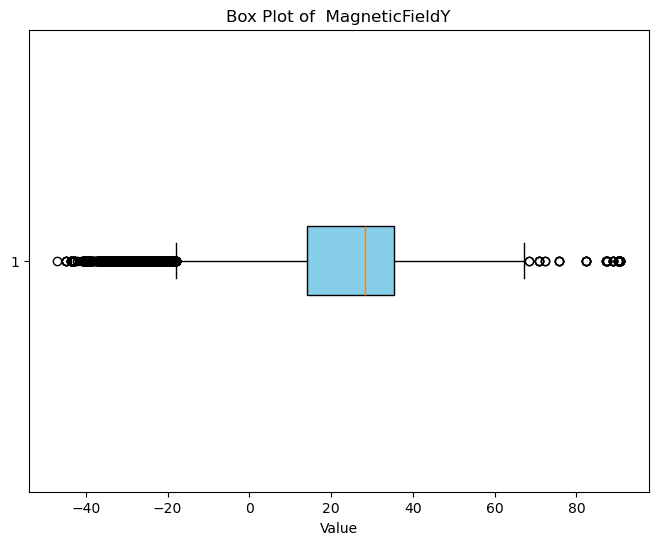

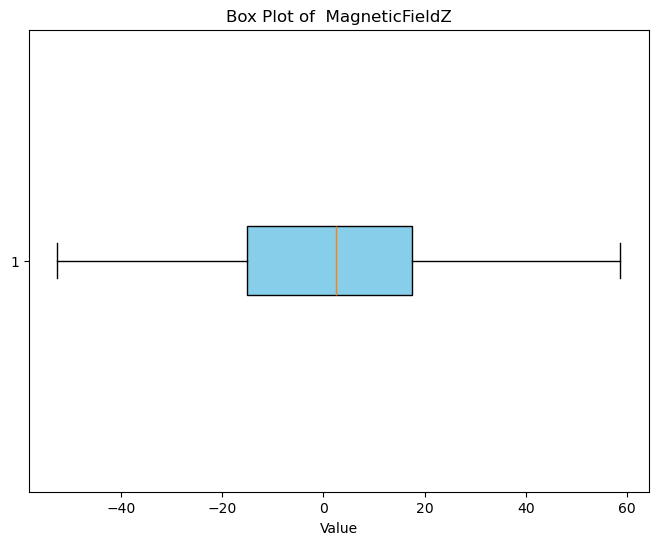

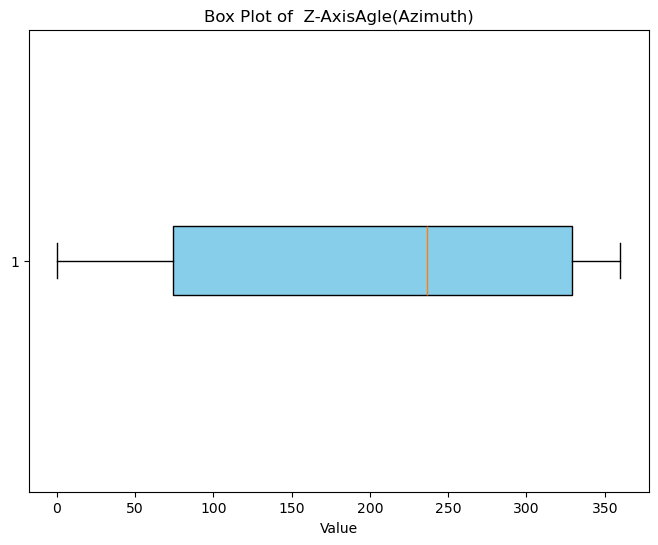

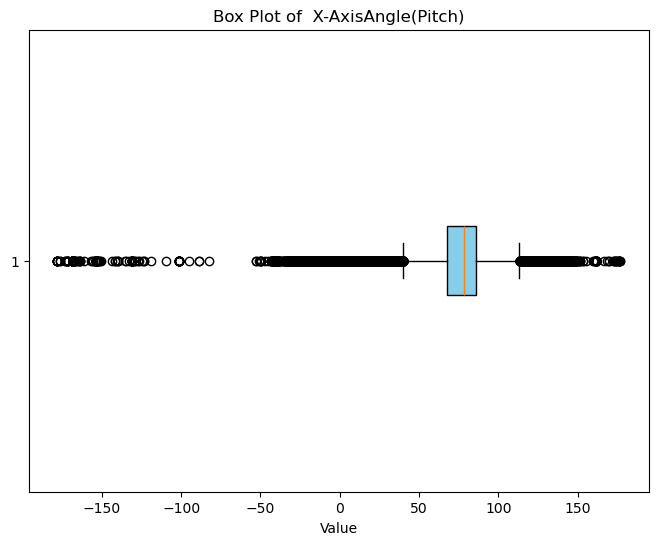

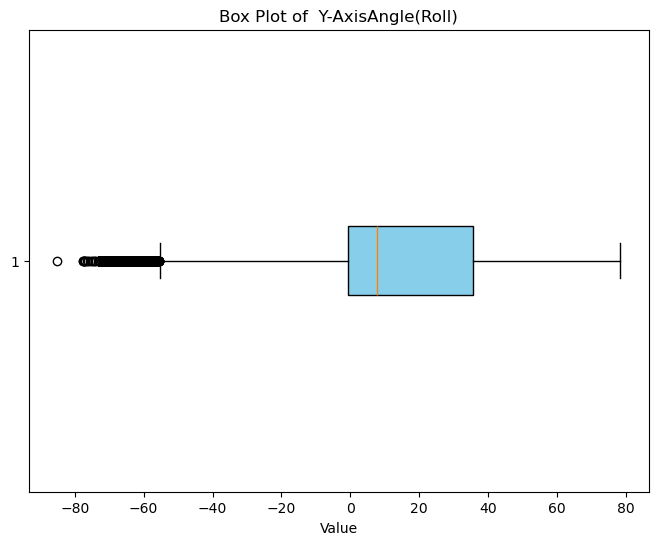

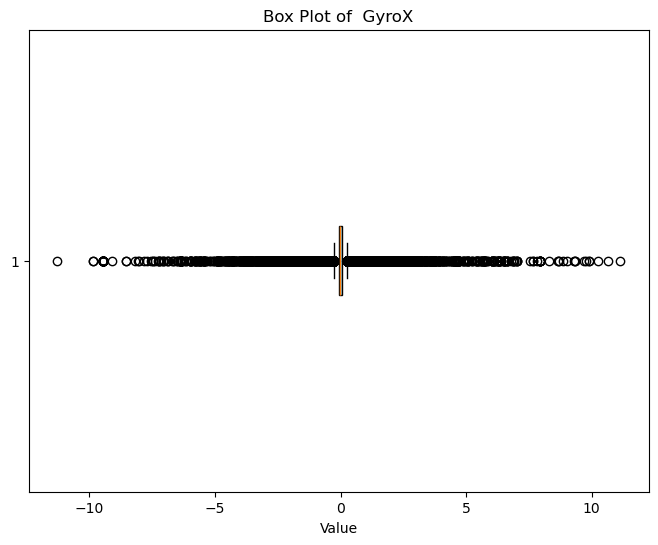

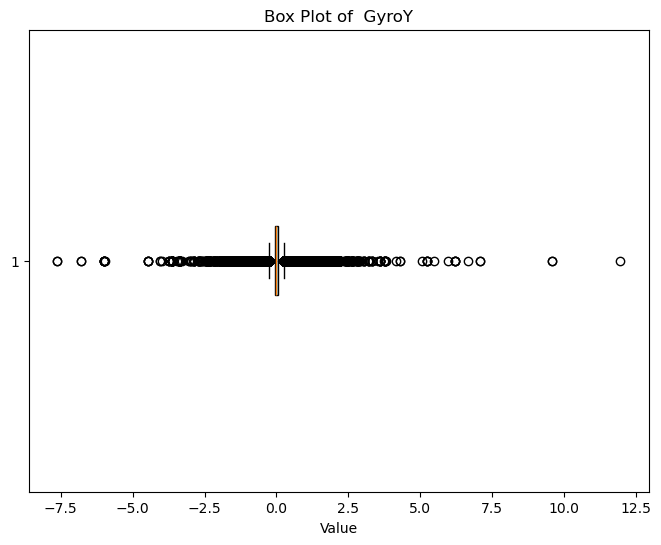

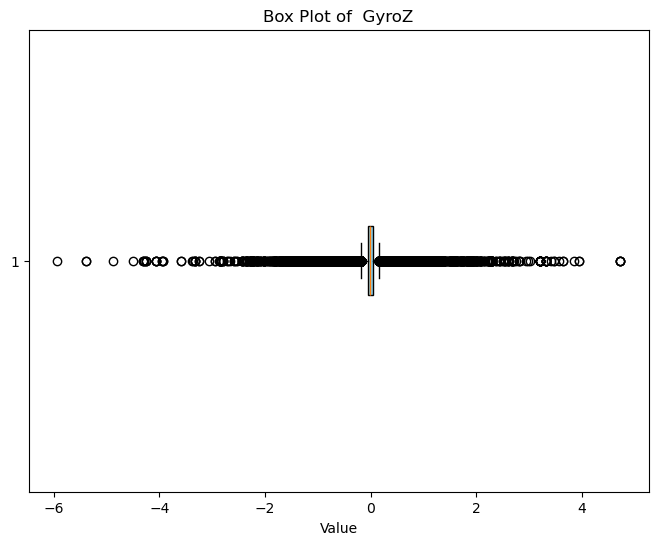

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "measure2_watch_sens.csv"
data = pd.read_csv(file_path)

# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Create box plots for each numerical column
for column in numerical_data.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(numerical_data[column], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()


In [26]:
data.describe()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
count,5.837400e+04,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000,58374.000000
mean,1.422827e+12,1.726072,-7.099805,1.906930,-4.769356,23.568268,0.892316,198.198215,71.880993,10.334409,-0.015220,-0.001513,-0.004305
std,1.798837e+08,4.561547,3.186476,3.317096,20.496038,16.323750,20.937565,126.326150,35.262366,30.202981,0.720377,0.401403,0.308089
min,1.422629e+12,-19.076000,-14.606000,-17.799000,-63.387000,-47.095000,-52.650000,0.000000,-178.445000,-85.213000,-11.303000,-7.641000,-5.946000
25%,1.422631e+12,-0.263000,-9.451000,0.468000,-21.028000,14.026000,-15.063000,74.352000,67.464750,-0.760000,-0.063000,-0.058000,-0.045000
50%,1.422872e+12,1.437500,-7.798000,1.725500,-6.133000,28.342000,2.563500,236.572000,78.120000,7.643500,-0.003000,0.001000,-0.003000
75%,1.423043e+12,5.690000,-6.381500,3.104000,9.082000,35.309000,17.557750,329.231000,85.835000,35.666000,0.059000,0.069000,0.040000
max,1.423128e+12,11.073000,11.105000,14.254000,56.525000,90.747000,58.643000,359.999000,177.019000,78.409000,11.146000,11.972000,4.735000
